In [1003]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Data Reading and Understanding

In [1004]:
data = pd.read_csv("day.csv")

In [1005]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1006]:
data.shape

(730, 16)

In [1007]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1008]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#Data Manipulation

Removing redundant or unwanted columns

In [1009]:
data = data.drop(["dteday","instant","casual","registered"],axis = 1)

In [1010]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Providing proper nomenclature for better readability

In [1011]:
data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'},inplace=True)

In [1012]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Mapping to proper values as per data dictionary given

In [1013]:
data.year =data.year.map({0:'2018',1:'2019'})
data.season =data.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
data.weathersit =data.weathersit.map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

In [1014]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,2018,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Creating Box Plot b/n categorical variable vs target variable

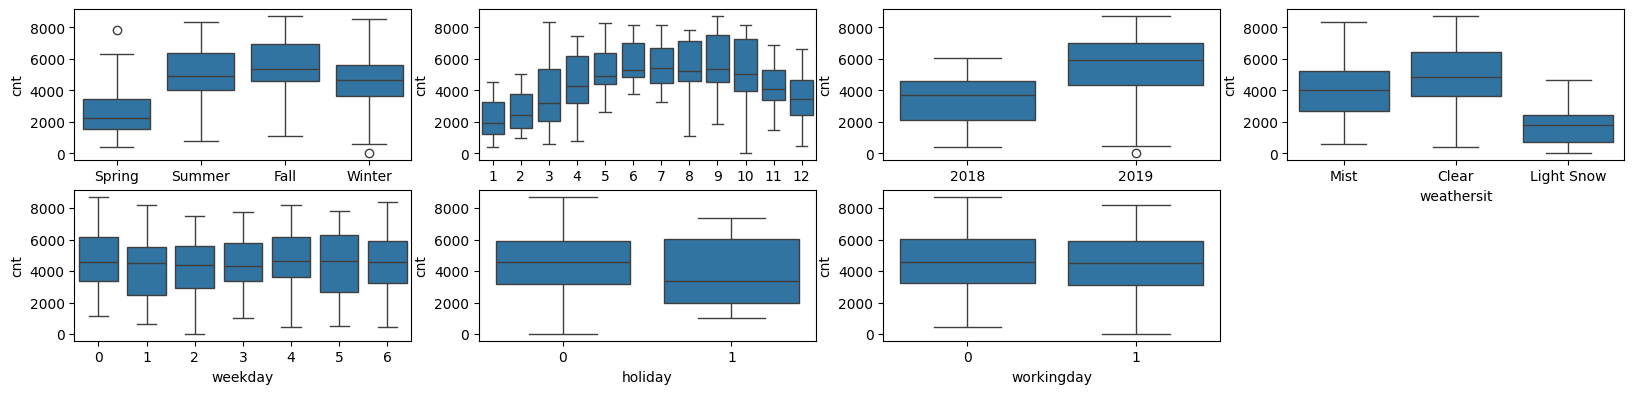

In [1015]:
def CreateBoxPlot(x):
  sns.boxplot(x=x, y= 'cnt', data=data)

plt.figure(figsize = (20,9))
plt.subplot(4,4,1)
CreateBoxPlot('season')
plt.subplot(4,4,2)
CreateBoxPlot('month')
plt.subplot(4,4,3)
CreateBoxPlot('year')
plt.subplot(4,4,4)
CreateBoxPlot('weathersit')
plt.subplot(4,4,5)
CreateBoxPlot('weekday')
plt.subplot(4,4,6)
CreateBoxPlot('holiday')
plt.subplot(4,4,7)
CreateBoxPlot('workingday')


As per above data year 2019 , seasons (summer,fall) weather situation (clear,mist) and in certain months (b/n 5 to 10) having positive corelation on target variable

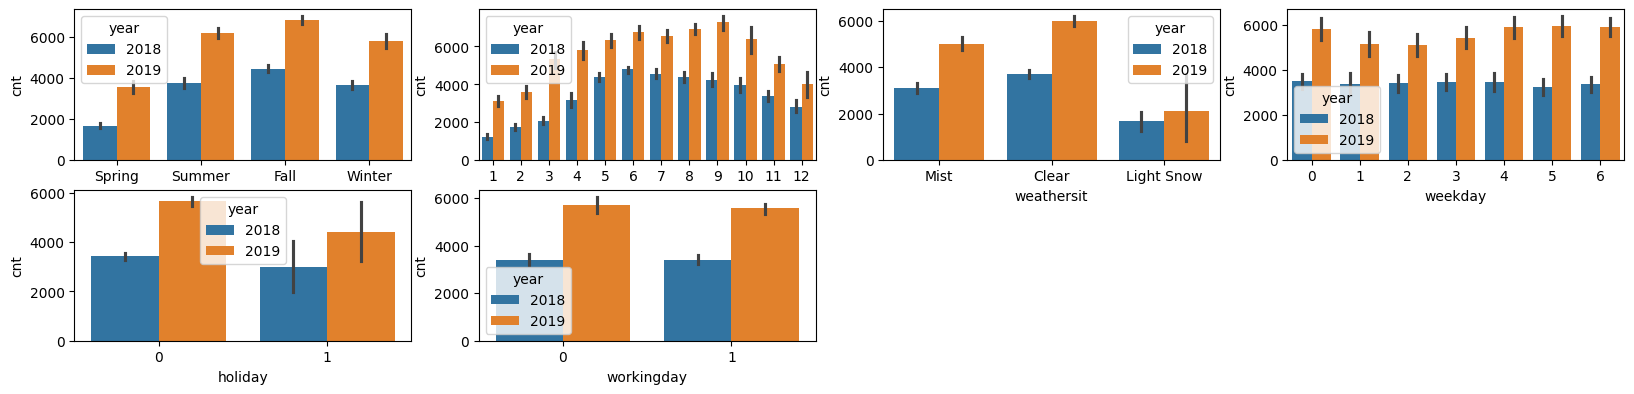

In [1016]:
def CreateBarPlot(x):
  sns.barplot(data=data,x=x, y= 'cnt', hue='year')
plt.figure(figsize = (20,9))
plt.subplot(4,4,1)
CreateBarPlot('season')
plt.subplot(4,4,2)
CreateBarPlot('month')
plt.subplot(4,4,3)
CreateBarPlot('weathersit')
plt.subplot(4,4,4)
CreateBarPlot('weekday')
plt.subplot(4,4,5)
CreateBarPlot('holiday')
plt.subplot(4,4,6)
CreateBarPlot('workingday')


Pair plot b/n numerical variable and target variable

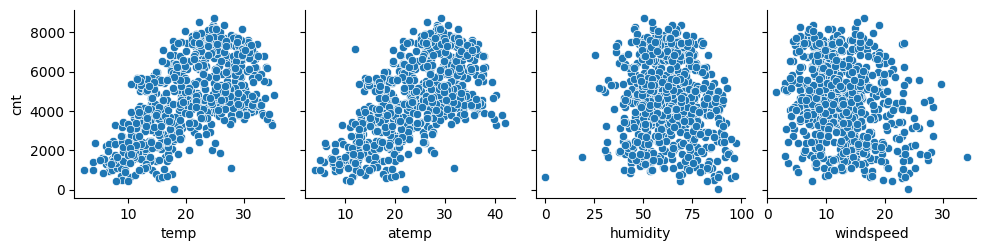

In [1017]:
sns.pairplot(data= data, x_vars = ['temp','atemp','humidity','windspeed'],y_vars = ['cnt'])

Based on above, temp/atemp having linerar relationship with target variable

<Axes: >

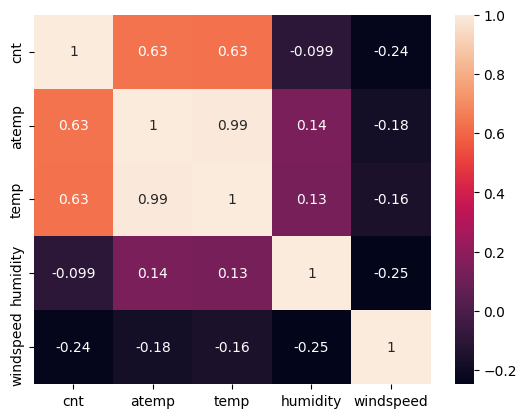

In [1018]:
sns.heatmap(data[['cnt','atemp','temp','humidity','windspeed']].corr(),annot=True )

In [1019]:
#dropping temp as temp and atemp having same effect on target
data.drop("temp",axis =1 , inplace =True)

In [1020]:
#sns.pairplot(data)

In [1021]:
data[['holiday','workingday','cnt']].corr()

,holiday,workingday,cnt
holiday,1.000000,-0.257009,-0.068764
workingday,-0.257009,1.000000,-0.027640
cnt,-0.068764,-0.027640,1.000000


In [1022]:
data[['humidity','windspeed','cnt']].corr()

,humidity,windspeed,cnt
humidity,1.000000,-0.248506,-0.098543
windspeed,-0.248506,1.000000,-0.235132
cnt,-0.098543,-0.235132,1.000000


Getting dummies for season and weathersituation

In [1023]:
season = pd.get_dummies(data['season'],drop_first=True)
weathersit = pd.get_dummies(data['weathersit'],drop_first=True)

In [1024]:
data = pd.concat([data,season,weathersit],axis = 1)

In [1025]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,cnt,Spring,Summer,Winter,Light Snow,Mist
0,Spring,2018,1,0,1,1,Mist,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,Spring,2018,1,0,2,1,Mist,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,Spring,2018,1,0,3,1,Clear,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,Spring,2018,1,0,4,1,Clear,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,Spring,2018,1,0,5,1,Clear,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [1026]:
#dropping the original columns after creating dummies
data.drop(['season','weathersit'],axis = 1,inplace=True )

In [1027]:
data.columns

Index(['year', 'month', 'holiday', 'weekday', 'workingday', 'atemp',
       'humidity', 'windspeed', 'cnt', 'Spring', 'Summer', 'Winter',
       'Light Snow', 'Mist'],
      dtype='object')

In [1028]:
data.shape

(730, 14)

In [1029]:
data[['workingday','weekday','cnt']].corr()

,workingday,weekday,cnt
workingday,1.000000,0.001588,-0.027640
weekday,0.001588,1.000000,0.036183
cnt,-0.027640,0.036183,1.000000


# Model A - Using OLS

In [1030]:
df_train,df_test = train_test_split(data,train_size = 0.7, random_state= 100)
print(df_train.shape)
print(df_test.shape)
data.columns

(510, 14)
(220, 14)


Index(['year', 'month', 'holiday', 'weekday', 'workingday', 'atemp',
       'humidity', 'windspeed', 'cnt', 'Spring', 'Summer', 'Winter',
       'Light Snow', 'Mist'],
      dtype='object')

In [1031]:
scaler = MinMaxScaler()
numlist = ['year','month','atemp','humidity','windspeed','weekday','cnt']
df_train[numlist]
df_train[numlist] = scaler.fit_transform(df_train[numlist])

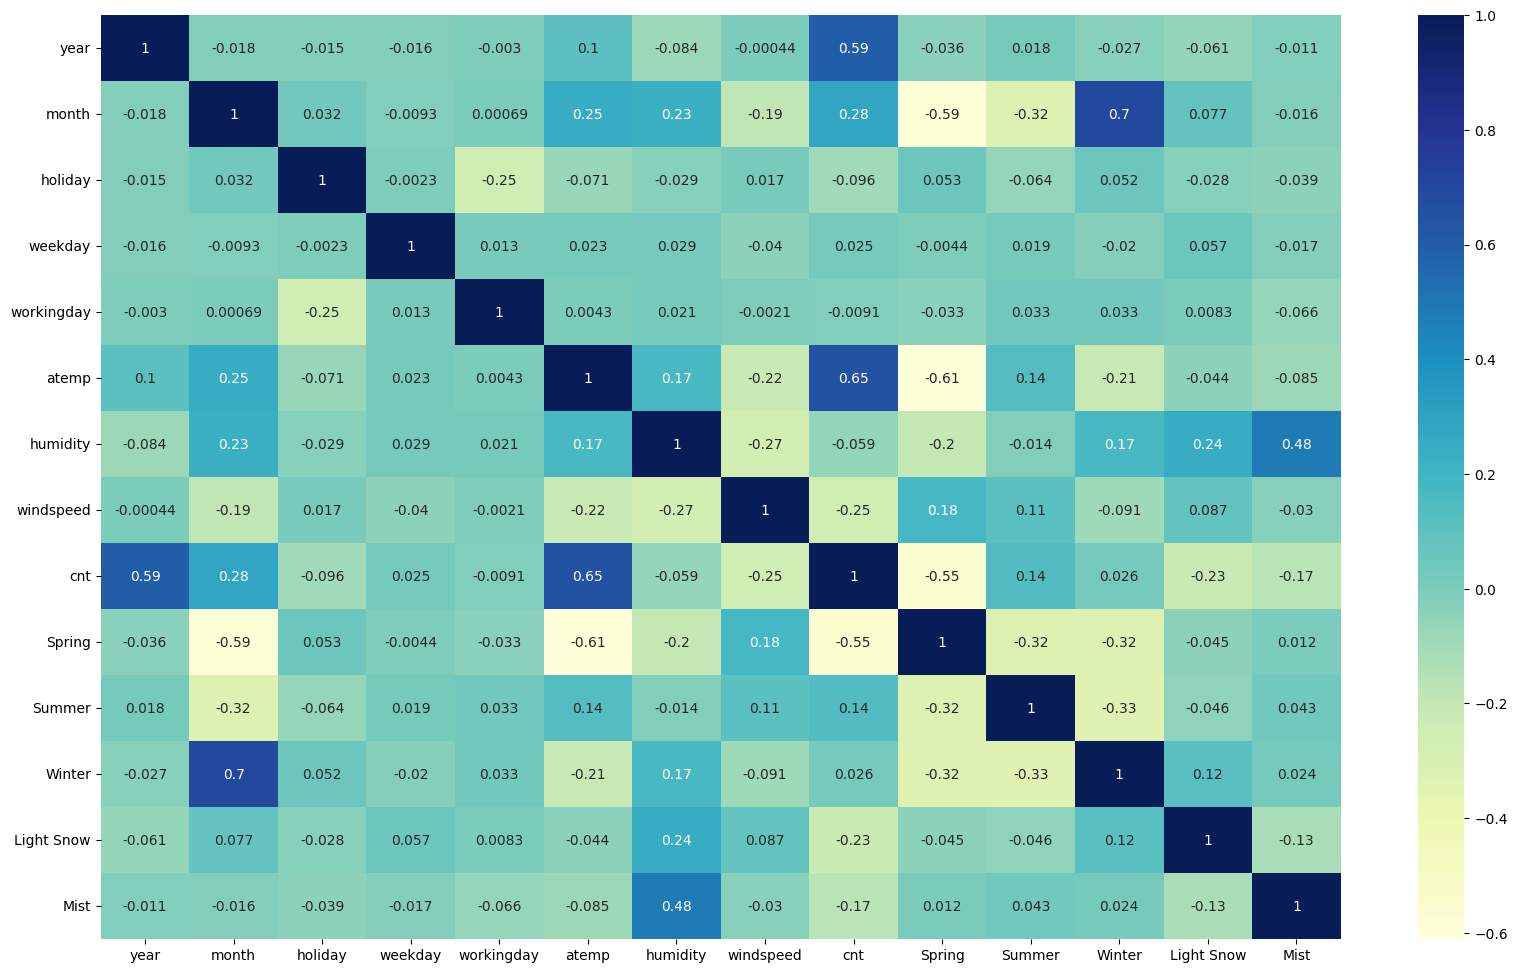

In [1032]:
plt.figure(figsize=(20,12))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [1033]:
df_train.head()

,year,month,holiday,weekday,workingday,atemp,humidity,windspeed,cnt,Spring,Summer,Winter,Light Snow,Mist
576,1.0,0.545455,0,0.500000,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1.0,0.181818,0,0.000000,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,1.0,1.000000,0,0.166667,1,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1.0,0.272727,0,0.000000,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1
111,0.0,0.272727,0,0.000000,0,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1


In [1034]:
df_train.describe()

,year,month,holiday,weekday,workingday,atemp,humidity,windspeed,cnt,Spring,Summer,Winter,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.503743,0.025490,0.491830,0.711765,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.500429,0.315038,0.157763,0.329528,0.453386,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1035]:
y_train= df_train.pop('cnt')
X_train = df_train
df_train.head()

,year,month,holiday,weekday,workingday,atemp,humidity,windspeed,Spring,Summer,Winter,Light Snow,Mist
576,1.0,0.545455,0,0.500000,1,0.766351,0.725633,0.264686,0,0,0,0,0
426,1.0,0.181818,0,0.000000,0,0.438975,0.640189,0.255342,1,0,0,0,1
728,1.0,1.000000,0,0.166667,1,0.200348,0.498067,0.663106,1,0,0,0,0
482,1.0,0.272727,0,0.000000,0,0.391735,0.504508,0.188475,0,1,0,0,1
111,0.0,0.272727,0,0.000000,0,0.318819,0.751824,0.380981,0,1,0,0,1


In [1036]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [1037]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
lrmodel.params
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     181.0
Date:                Fri, 26 Jan 2024   Prob (F-statistic):          1.05e-178
Time:                        23:09:37   Log-Likelihood:                 484.63
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     496   BIC:                            -882.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3080      0.038      8.010      0.000       0.232       0.384
year           0.2325      0.009     27.238      0.000       0.216       0.249
month          0.0180      0.026      0.685      0.494      -0.034       0.070
holiday       -0.1000      0.028     -3.598      0.000      -0.155      -0.045
weekday        0.0201      0.013      1.568      0.118      -0.005       0.045
workingday    -0.0219      0.010     -2.261      0.024      -0.041      -0.003
atemp          0.4901      0.036     13.747      0.000       0.420       0.560
humidity      -0.1363      0.040     -3.435      0.001      -0.214      -0.058
windspeed     -0.1621      0.027     -5.980      0.000      -0.215      -0.109
Spring        -0.0899      0.023     -3.971      0.000      -0.134      -0.045
Summer         0.0335      0.015      2.180      0.030       0.003       0.064
Winter         0.0622      0.018      3.452      0.001       0.027       0.098
Light Snow    -0.2399      0.028     -8.614      0.000      -0.295      -0.185
Mist          -0.0551      0.011     -4.959      0.000      -0.077      -0.033
==============================================================================
Omnibus:                       68.117   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.891
Skew:                          -0.685   Prob(JB):                     1.28e-37
Kurtosis:                       5.473   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1038]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)


In [1039]:
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
6,humidity,30.73
5,atemp,16.07
1,month,12.24
7,windspeed,4.68
10,Winter,4.25
8,Spring,4.15
4,workingday,3.68
3,weekday,3.18
9,Summer,2.57
12,Mist,2.35


Month has high P-value and also high VIF , so dropping

In [1040]:
X_train= X_train.drop(['month'],axis = 1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
lrmodel.params
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     196.2
Date:                Fri, 26 Jan 2024   Prob (F-statistic):          9.27e-180
Time:                        23:09:37   Log-Likelihood:                 484.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     497   BIC:                            -887.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3170      0.036      8.764      0.000       0.246       0.388
year           0.2323      0.009     27.247      0.000       0.216       0.249
holiday       -0.0995      0.028     -3.582      0.000      -0.154      -0.045
weekday        0.0201      0.013      1.572      0.117      -0.005       0.045
workingday    -0.0221      0.010     -2.287      0.023      -0.041      -0.003
atemp          0.4911      0.036     13.794      0.000       0.421       0.561
humidity      -0.1338      0.039     -3.389      0.001      -0.211      -0.056
windspeed     -0.1616      0.027     -5.967      0.000      -0.215      -0.108
Spring        -0.0972      0.020     -4.867      0.000      -0.136      -0.058
Summer         0.0286      0.014      2.106      0.036       0.002       0.055
Winter         0.0674      0.016      4.131      0.000       0.035       0.099
Light Snow    -0.2409      0.028     -8.669      0.000      -0.296      -0.186
Mist          -0.0555      0.011     -5.006      0.000      -0.077      -0.034
==============================================================================
Omnibus:                       68.486   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.605
Skew:                          -0.687   Prob(JB):                     5.45e-38
Kurtosis:                       5.487   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1041]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
5,humidity,27.90
4,atemp,14.87
6,windspeed,4.54
3,workingday,3.68
7,Spring,3.64
2,weekday,3.17
9,Winter,2.92
11,Mist,2.32
8,Summer,2.22
0,year,2.07


Then weekday had high P-value, though it has small VIF, as per the order we need to remove the ones which has high P-values

In [1042]:
X_train= X_train.drop(['weekday'],axis = 1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
lrmodel.params
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.2
Date:                Fri, 26 Jan 2024   Prob (F-statistic):          2.12e-180
Time:                        23:09:37   Log-Likelihood:                 483.13
No. Observations:                 510   AIC:                            -942.3
Df Residuals:                     498   BIC:                            -891.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3263      0.036      9.133      0.000       0.256       0.397
year           0.2321      0.009     27.187      0.000       0.215       0.249
holiday       -0.0992      0.028     -3.569      0.000      -0.154      -0.045
workingday    -0.0219      0.010     -2.265      0.024      -0.041      -0.003
atemp          0.4921      0.036     13.805      0.000       0.422       0.562
humidity      -0.1334      0.040     -3.372      0.001      -0.211      -0.056
windspeed     -0.1634      0.027     -6.032      0.000      -0.217      -0.110
Spring        -0.0966      0.020     -4.830      0.000      -0.136      -0.057
Summer         0.0291      0.014      2.143      0.033       0.002       0.056
Winter         0.0674      0.016      4.122      0.000       0.035       0.099
Light Snow    -0.2385      0.028     -8.583      0.000      -0.293      -0.184
Mist          -0.0557      0.011     -5.017      0.000      -0.078      -0.034
==============================================================================
Omnibus:                       72.414   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.561
Skew:                          -0.725   Prob(JB):                     3.75e-40
Kurtosis:                       5.538   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1043]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
4,humidity,27.52
3,atemp,14.58
5,windspeed,4.53
2,workingday,3.67
6,Spring,3.56
8,Winter,2.90
10,Mist,2.32
7,Summer,2.20
0,year,2.07
9,Light Snow,1.25


Now all P-Values are ok, but Humidity VIF is > 5, so dropping

In [1044]:
X_train= X_train.drop(['humidity'],axis = 1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
lrmodel.params
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.6
Date:                Fri, 26 Jan 2024   Prob (F-statistic):          3.68e-179
Time:                        23:09:44   Log-Likelihood:                 477.37
No. Observations:                 510   AIC:                            -932.7
Df Residuals:                     499   BIC:                            -886.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2603      0.030      8.620      0.000       0.201       0.320
year           0.2352      0.009     27.440      0.000       0.218       0.252
holiday       -0.1022      0.028     -3.641      0.000      -0.157      -0.047
workingday    -0.0241      0.010     -2.475      0.014      -0.043      -0.005
atemp          0.4628      0.035     13.250      0.000       0.394       0.531
windspeed     -0.1377      0.026     -5.242      0.000      -0.189      -0.086
Spring        -0.1033      0.020     -5.137      0.000      -0.143      -0.064
Summer         0.0252      0.014      1.840      0.066      -0.002       0.052
Winter         0.0564      0.016      3.487      0.001       0.025       0.088
Light Snow    -0.2758      0.026    -10.705      0.000      -0.326      -0.225
Mist          -0.0775      0.009     -8.495      0.000      -0.095      -0.060
==============================================================================
Omnibus:                       70.720   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.129
Skew:                          -0.726   Prob(JB):                     3.10e-37
Kurtosis:                       5.409   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1045]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
4,windspeed,4.51
3,atemp,4.48
2,workingday,3.55
5,Spring,2.15
0,year,2.06
6,Summer,1.87
7,Winter,1.78
9,Mist,1.53
1,holiday,1.10
8,Light Snow,1.08


It brings P-value of summer > 0.05 , so dropping to get optimal values for P and VIF

In [1046]:
X_train= X_train.drop(['Summer'],axis = 1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
lrmodel.params
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 26 Jan 2024   Prob (F-statistic):          1.21e-179
Time:                        23:10:19   Log-Likelihood:                 475.65
No. Observations:                 510   AIC:                            -931.3
Df Residuals:                     500   BIC:                            -888.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2891      0.026     11.161      0.000       0.238       0.340
year           0.2357      0.009     27.446      0.000       0.219       0.253
holiday       -0.1030      0.028     -3.658      0.000      -0.158      -0.048
workingday    -0.0234      0.010     -2.399      0.017      -0.043      -0.004
atemp          0.4336      0.031     13.902      0.000       0.372       0.495
windspeed     -0.1318      0.026     -5.044      0.000      -0.183      -0.080
Spring        -0.1268      0.016     -8.149      0.000      -0.157      -0.096
Winter         0.0378      0.013      2.987      0.003       0.013       0.063
Light Snow    -0.2778      0.026    -10.768      0.000      -0.328      -0.227
Mist          -0.0769      0.009     -8.420      0.000      -0.095      -0.059
==============================================================================
Omnibus:                       71.617   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.276
Skew:                          -0.739   Prob(JB):                     2.88e-37
Kurtosis:                       5.395   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1047]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
3,atemp,4.48
4,windspeed,3.93
2,workingday,3.42
0,year,2.05
5,Spring,1.75
8,Mist,1.50
6,Winter,1.46
1,holiday,1.10
7,Light Snow,1.08


Now model has proper P and VIF values with R value 82.0, let us see how residual and on test data how model works

#Model A- Residual analysis

In [1048]:
y_train_pred = lrmodel.predict(X_train_sm)

In [1049]:
res = y_train-y_train_pred

<ipython-input-1050-4fe8f7297e5d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

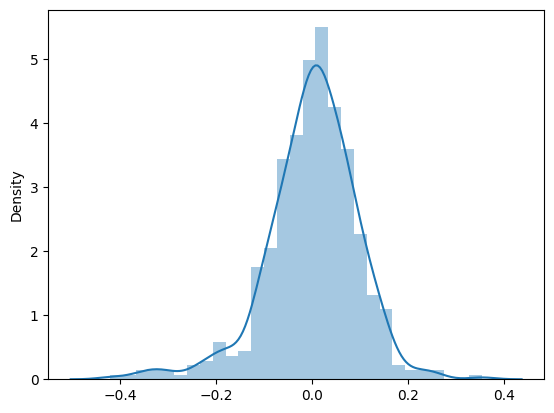

In [1050]:
sns.distplot(res)

In [1051]:
df_test[numlist] = scaler.transform(df_test[numlist])

In [1052]:
df_test.head()

,year,month,holiday,weekday,workingday,atemp,humidity,windspeed,cnt,Spring,Summer,Winter,Light Snow,Mist
184,0.0,0.545455,1,0.500000,0,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1
535,1.0,0.454545,0,0.666667,1,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0
299,0.0,0.818182,0,1.000000,0,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1
221,0.0,0.636364,0,0.833333,1,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0
152,0.0,0.454545,0,1.000000,0,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0


In [1053]:
df_test.describe()

,year,month,holiday,weekday,workingday,atemp,humidity,windspeed,cnt,Spring,Summer,Winter,Light Snow,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.499174,0.036364,0.516667,0.640909,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.027273,0.318182
std,0.500809,0.311120,0.187620,0.342307,0.480828,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [1054]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1055]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.drop(['humidity','month','weekday','Summer'],axis=1, inplace =True)

In [1056]:
y_test_pred = lrmodel.predict(X_test_sm)

In [1057]:
r2_score(y_true = y_test, y_pred=y_test_pred)

0.8060838329418796

Model A R2 score - 82.0
Adjusted R2 score - 81.6  
Test data R2 score - 80.6

Top 3 variables - Year, atemp and Winter



# Model B - RFE analysis- Variable selction

In [1059]:
from sklearn.model_selection import train_test_split
df_train1,df_test1 = train_test_split(data, train_size = .70,test_size = .30, random_state = 100)

In [1060]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1061]:
numlist = ['year','month','atemp','humidity','windspeed','weekday','cnt']
df_train1[numlist]
df_train1[numlist] = scaler.fit_transform(df_train1[numlist])

In [1062]:
y_train1 = df_train1.pop('cnt')
X_train1 = df_train1

In [1063]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1064]:
lm = LinearRegression()
lm.fit(X_train1, y_train1)

rfe = RFE(lm, step=13)             # running RFE
rfe = rfe.fit(X_train1, y_train1)

In [1065]:
list(zip(X_train1.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('month', False, 2),
 ('holiday', True, 1),
 ('weekday', False, 2),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Spring', False, 2),
 ('Summer', False, 2),
 ('Winter', False, 2),
 ('Light Snow', True, 1),
 ('Mist', False, 2)]

In [1066]:
#supported columns
col = X_train1.columns[rfe.support_]
col

Index(['year', 'holiday', 'atemp', 'humidity', 'windspeed', 'Light Snow'], dtype='object')

In [1067]:
#not supported columns
cols = X_train1.columns[~rfe.support_]
cols

Index(['month', 'weekday', 'workingday', 'Spring', 'Summer', 'Winter', 'Mist'], dtype='object')

Build the model only using supported columns

In [1068]:
X_train_rfe = X_train1[col]
import statsmodels.api as sm
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm= sm.OLS(y_train1,X_train_rfe_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     255.5
Date:                Fri, 26 Jan 2024   Prob (F-statistic):          3.50e-149
Time:                        23:13:13   Log-Likelihood:                 395.05
No. Observations:                 510   AIC:                            -776.1
Df Residuals:                     503   BIC:                            -746.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2815      0.031      8.978      0.0

In [1069]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
3,humidity,8.56
2,atemp,6.64
4,windspeed,3.40
0,year,2.01
5,Light Snow,1.08
1,holiday,1.03


Removing humidity column as VIF > 5

In [1070]:
X_train_rfe = X_train1[['year', 'holiday', 'atemp', 'windspeed', 'Light Snow']]
import statsmodels.api as sm
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm= sm.OLS(y_train1,X_train_rfe_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     287.1
Date:                Fri, 26 Jan 2024   Prob (F-statistic):          6.37e-145
Time:                        23:13:30   Log-Likelihood:                 382.14
No. Observations:                 510   AIC:                            -752.3
Df Residuals:                     504   BIC:                            -726.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1515      0.019      8.069      0.0

In [1071]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,atemp,3.03
3,windspeed,2.73
0,year,1.98
4,Light Snow,1.04
1,holiday,1.02


Now model has optimal P and VIF values and see how residual analysis and test data works

Residual analysis

<ipython-input-1073-192ef5c36535>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred)


<Axes: ylabel='Density'>

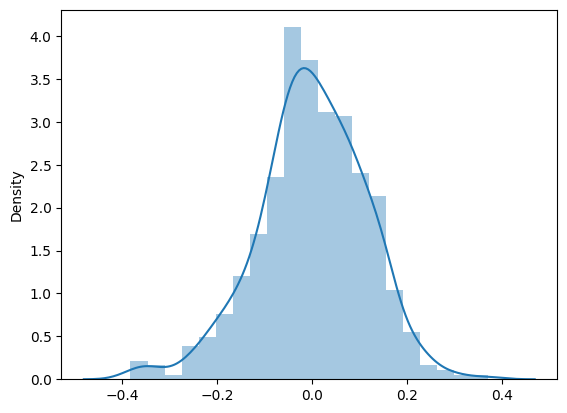

In [1073]:
y_train_pred = lm.predict(X_train_rfe_sm)
y_pred =y_train - y_train_pred
sns.distplot(y_pred)

Test data analysis

In [1074]:
numlist = ['year','month','atemp','humidity','windspeed','weekday','cnt']
df_test1[numlist] = scaler.transform(df_test1[numlist])
y_test1 = df_test1.pop('cnt')
X_test1 = df_test1
X_test1_sm = sm.add_constant(X_test1)

X_test1_sm.drop(['month', 'weekday', 'workingday', 'Spring', 'Summer', 'Winter', 'Mist','humidity'],axis=1, inplace =True)
y_test_pred1 = lm.predict(X_test1_sm)
r2_score(y_true = y_test1, y_pred=y_test_pred1)

0.7038671977853642

Model B R2 score - 74.0
Test data R2 score - 70.38

# Model C - by dividing months clearly and see how model will look like (RFE)

Chosen RFE as after adding months number of columns will increase more

In [958]:
data.head()

,year,month,holiday,weekday,workingday,atemp,humidity,windspeed,cnt,Spring,Summer,Winter,Light Snow,Mist
0,2018,1,0,1,1,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,2018,1,0,2,1,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,2018,1,0,3,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,2018,1,0,4,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,2018,1,0,5,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [959]:
data.shape

(730, 14)

In [960]:
data.month =data.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

In [961]:
month = pd.get_dummies(data['month'],drop_first=True)

In [962]:
data = pd.concat([data,month],axis = 1)

In [963]:
data.drop('month',axis =1, inplace=True)

In [964]:
data.head()

,year,holiday,weekday,workingday,atemp,humidity,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,2018,0,1,1,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2018,0,2,1,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,2018,0,3,1,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2018,0,4,1,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2018,0,5,1,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [965]:
from sklearn.model_selection import train_test_split
df_train1,df_test1 = train_test_split(data, train_size = .70,test_size = .30, random_state = 100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numlist = ['year','atemp','humidity','windspeed','weekday','cnt']
df_train1[numlist]
df_train1[numlist] = scaler.fit_transform(df_train1[numlist])

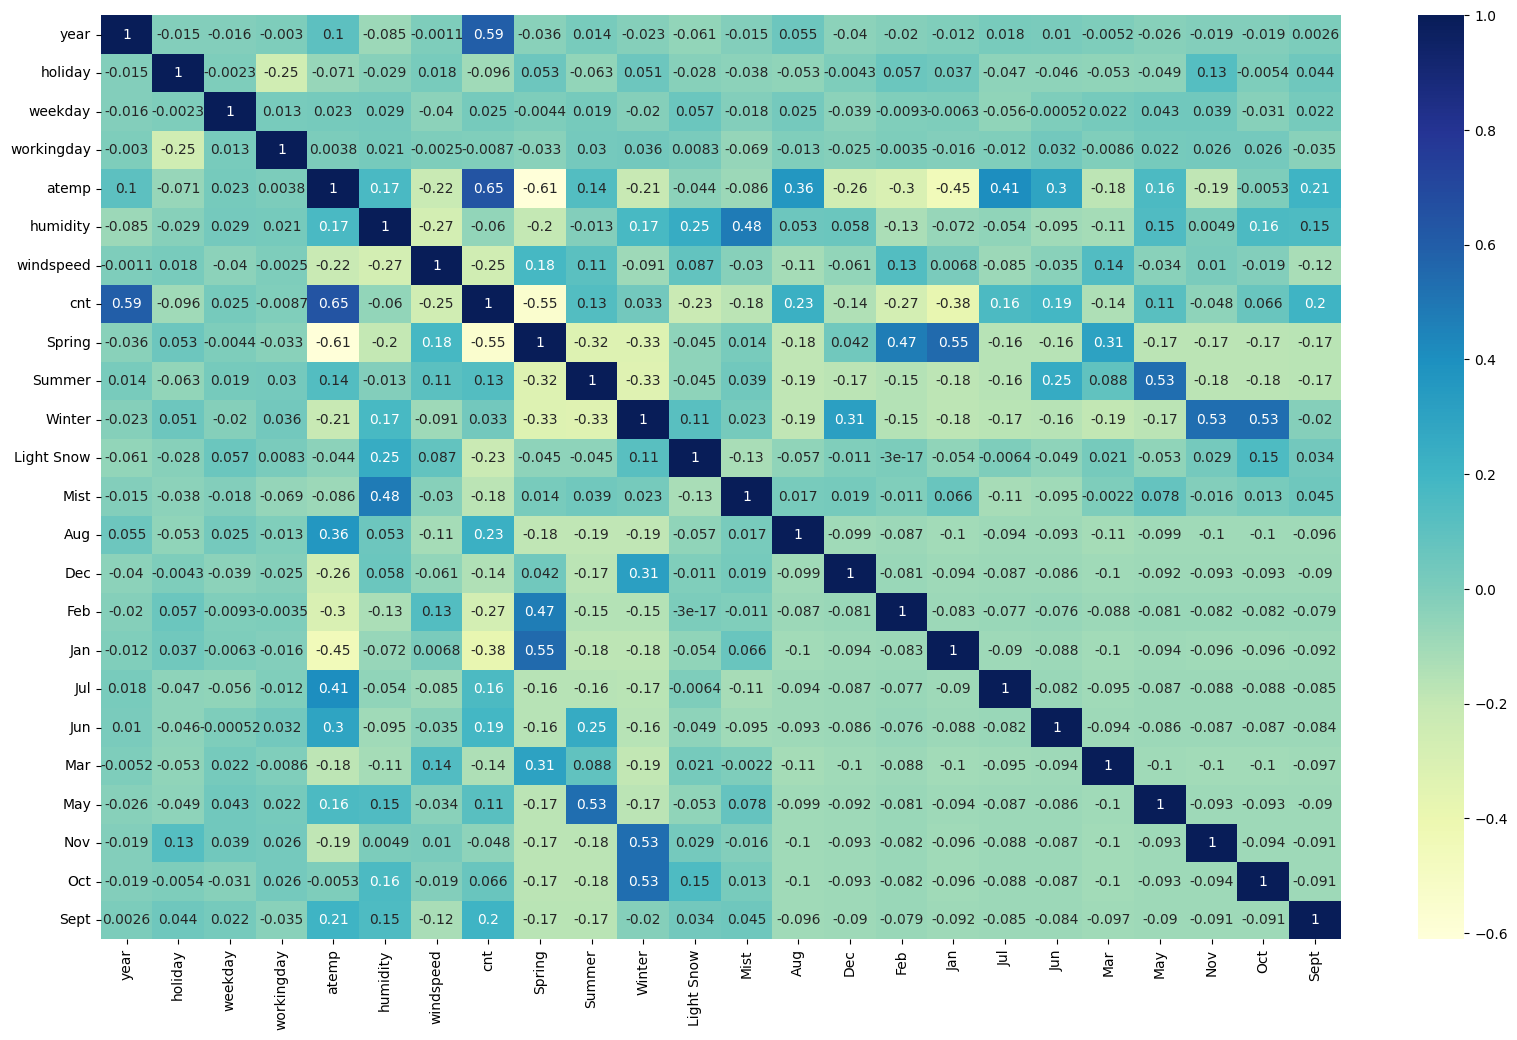

In [966]:
plt.figure(figsize=(20,12))
sns.heatmap(df_train1.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [967]:
#dropping weekly correlated varaibles
df_train1.drop(['humidity','workingday','holiday','weekday','Winter'],axis = 1, inplace=True)
y_train1 = df_train1.pop('cnt')
X_train1 = df_train1


In [968]:
df_train1.shape

(510, 18)

In [969]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train1, y_train1)

rfe = RFE(lm, step=16)             # running RFE
rfe = rfe.fit(X_train1, y_train1)

list(zip(X_train1.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('atemp', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 2),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 2),
 ('Dec', False, 2),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sept', True, 1)]

In [970]:
pcol = X_train1.columns[rfe.support_]
pcol

Index(['year', 'atemp', 'windspeed', 'Spring', 'Light Snow', 'Mist', 'Jan',
       'Jul', 'Sept'],
      dtype='object')

In [971]:
ncol = X_train1.columns[~rfe.support_]
ncol

Index(['Summer', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct'], dtype='object')

In [972]:
X_train_rfe = X_train1[pcol]
import statsmodels.api as sm
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm= sm.OLS(y_train1,X_train_rfe_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.7
Date:                Fri, 26 Jan 2024   Prob (F-statistic):          3.44e-183
Time:                        22:52:27   Log-Likelihood:                 483.61
No. Observations:                 510   AIC:                            -947.2
Df Residuals:                     500   BIC:                            -904.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3069      0.020     15.336      0.0

In [974]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

,Features,VIF
0,year,2.04
1,atemp,4.52
2,windspeed,3.74
3,Spring,2.10
4,Light Snow,1.06
5,Mist,1.50
6,Jan,1.60
7,Jul,1.32
8,Sept,1.19


# Residual Analysis - Model C

In [975]:
y_train1_pred = lm.predict(X_train_rfe_sm)

<ipython-input-976-02bd695cf927>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred1)


<Axes: ylabel='Density'>

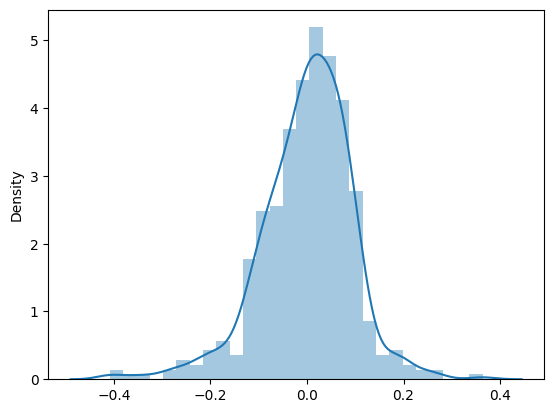

In [976]:
y_pred1 = y_train1-y_train1_pred
sns.distplot(y_pred1)

In [977]:
numlist = ['year','atemp','humidity','windspeed','weekday','cnt']
df_test1[numlist] = scaler.transform(df_test1[numlist])
y_test1 = df_test1.pop('cnt')
df_test1.drop(['humidity','workingday','holiday','weekday','Winter'],axis = 1, inplace=True)


In [978]:
X_test1 = df_test1
X_test1_sm = sm.add_constant(X_test1)

X_test1_sm.drop(['Summer', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct'],axis=1, inplace =True)
y_test_pred1 = lm.predict(X_test1_sm)
r2_score(y_true = y_test1, y_pred=y_test_pred1)

0.7998233452101488

Model C R2 score - 82.5
Adjusted model C R2 score - 82.2
Test data R2 score - 79.9

Year , Temp and Sept months are top 3 which can increase target
as per Model C

# Conclusion


*   Model A and Model C are having similar R2 score and working properly with test data

*   In both models common variables which effecting positively on target is Year and Temparature

*   This is also matching with data visulaization analysis
*   LR model A is the final model if we need to choose with below coefficients as it has good test data and model R2 score > 80%
const        0.2891
year	       0.2357
holiday	    -0.1030
workingday	-0.0234
atemp	       0.4336
windspeed	  -0.1318
Spring	    -0.1268
Winter	     0.0378
Light Snow	-0.2778
Mist	      -0.0769






